# Challenge-2:SDG-3 Good health and wellbeing
## Data Science for social good Hackathon 
## Using supervised learning techniques

In [235]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("NFHS.xlsx - NFHS.csv")

# Success - Display the first record
display(data.head(n=10))

,Sl.No,Category,Indicators (2019-20),Urban,Rural,Total (2019-20),Total (2015-16),Adilabad,Bhadradri,Hyderabad,...,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
0,1.0,Population and Household Profile,1. Female population age 6 years and above who...,75.9,52.4,60.9,62.6,58.6,62.7,80.3,...,56.4,68.6,60.2,60.8,57.4,53.1,49.3,51.8,70.3,59.1
1,2.0,Population and Household Profile,2. Population below age 15 years (%),23.4,22,22.5,25.1,24.8,19.5,23,...,21.3,24.1,24.5,22,18.9,24.9,24.8,17.3,20.2,23
2,3.0,Population and Household Profile,3. Sex ratio of the total population (females ...,1015,1070,1049,1007,992,1082,959,...,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183
3,4.0,Population and Household Profile,4. Sex ratio at birth for children born in the...,873,907,894,872,785,817,844,...,1115,964,1039,976,980,775,987,698,829,954
4,5.0,Population and Household Profile,5. Children under age 5 years whose birth was ...,92.9,88,90,83.1,83.9,90,94.3,...,91.2,93.4,79.7,90,92.7,91.6,90.5,82.6,82.4,93.8
5,6.0,Population and Household Profile,6. Deaths in the last 3 years registered with ...,79,71.3,73.5,na,77.3,75.3,82.8,...,76.7,72.8,71.5,71.8,70.1,57.6,75.7,70.3,77.7,71.1
6,7.0,Population and Household Profile,7. Population living in households with electr...,99.8,99.4,99.6,98.9,99.2,99.4,99.9,...,99.8,99.7,99.6,99.5,99.4,99.1,99.2,99.7,99.6,99.6
7,8.0,Population and Household Profile,8. Population living in households with an imp...,99.4,98.4,98.7,97.7,95.7,99.1,99.6,...,98.7,99.4,99.4,97.2,99.8,99.7,99.4,99,99.1,99.7
8,9.0,Population and Household Profile,9. Population living in households that use an...,81.8,72.9,76.2,52.3,50.8,75.3,84.4,...,77.4,81.1,68,84.1,77.9,66.7,75.9,74.3,81.2,81.9
9,10.0,Population and Household Profile,10. Households using clean fuel for cooking3 (%),98.2,88.3,91.8,67.3,81.6,89.2,99.5,...,96.6,97,81.1,93.2,94.5,76,88.9,87.8,94.6,94.9


## Preprocessiong and selecting the relevant features of the given data which contains many features

--> Here I am taking the 'Population and Household Profile' and 'Marriage and Fertility' column data and then tries to map it to the nutritional stauts of women as such lucidating some important correleation that would directly impact the nutritional indicators of women in the given data.. And I chosen these features due to the singnificant ripple effect it may cause on the society as whole when women are not nurtuted or healty where as a whole we end up going backward in devlopment in every field of life.. So Let get started with this..!!

In [236]:
#Selecting the features we want
new_Data=data[data['Category']=='Population and Household Profile'] 
new_Data1=data[data['Category']=='Marriage and Fertility']
new_Data2=data[data['Category']=='Nutritional Status of Women (age 15-49 years)']
new_Data=pd.concat([new_Data,new_Data1,new_Data2],axis=0)
#Cleaning up the data which cantain irrelevant data
new_Data.fillna(0,inplace=True)
new_Data=new_Data.replace('na',0)
display(new_Data.head(n=20))

,Sl.No,Category,Indicators (2019-20),Urban,Rural,Total (2019-20),Total (2015-16),Adilabad,Bhadradri,Hyderabad,...,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
0,1.0,Population and Household Profile,1. Female population age 6 years and above who...,75.9,52.4,60.9,62.6,58.6,62.7,80.3,...,56.4,68.6,60.2,60.8,57.4,53.1,49.3,51.8,70.3,59.1
1,2.0,Population and Household Profile,2. Population below age 15 years (%),23.4,22,22.5,25.1,24.8,19.5,23,...,21.3,24.1,24.5,22,18.9,24.9,24.8,17.3,20.2,23
2,3.0,Population and Household Profile,3. Sex ratio of the total population (females ...,1015,1070,1049,1007,992,1082,959,...,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183
3,4.0,Population and Household Profile,4. Sex ratio at birth for children born in the...,873,907,894,872,785,817,844,...,1115,964,1039,976,980,775,987,698,829,954
4,5.0,Population and Household Profile,5. Children under age 5 years whose birth was ...,92.9,88,90,83.1,83.9,90,94.3,...,91.2,93.4,79.7,90,92.7,91.6,90.5,82.6,82.4,93.8
5,6.0,Population and Household Profile,6. Deaths in the last 3 years registered with ...,79,71.3,73.5,0,77.3,75.3,82.8,...,76.7,72.8,71.5,71.8,70.1,57.6,75.7,70.3,77.7,71.1
6,7.0,Population and Household Profile,7. Population living in households with electr...,99.8,99.4,99.6,98.9,99.2,99.4,99.9,...,99.8,99.7,99.6,99.5,99.4,99.1,99.2,99.7,99.6,99.6
7,8.0,Population and Household Profile,8. Population living in households with an imp...,99.4,98.4,98.7,97.7,95.7,99.1,99.6,...,98.7,99.4,99.4,97.2,99.8,99.7,99.4,99,99.1,99.7
8,9.0,Population and Household Profile,9. Population living in households that use an...,81.8,72.9,76.2,52.3,50.8,75.3,84.4,...,77.4,81.1,68,84.1,77.9,66.7,75.9,74.3,81.2,81.9
9,10.0,Population and Household Profile,10. Households using clean fuel for cooking3 (%),98.2,88.3,91.8,67.3,81.6,89.2,99.5,...,96.6,97,81.1,93.2,94.5,76,88.9,87.8,94.6,94.9


In [237]:
#from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
#scaler = MinMaxScaler() # default=(0, 1)
#numerical = ['Urban', 'Rural', 'Total (2019-20)', 'Total (2015-16)']

#features_log_minmax_transform = pd.DataFrame(data = new_Data)
#new_Data[numerical] = scaler.fit_transform(new_Data[numerical])

# Show an example of a record with scaling applied
#display(new_Data.head(n = 20))

# Structuring the data
 Here the given is in a kinda of raw state as has given by the official records which can't be fed into the algorithms as such we have to restructure it according to our wish to applicable for the algorithm we have in the sklearn package or for that matter to anything package algorithm

In [238]:
# Transposing the data
sample=new_Data.transpose()
#displaying the data
display(sample.head())
#removing these columns as they interfer in the application of algorithms 
sample1=sample.drop(index=['Sl.No','Category','Indicators (2019-20)'])
#displaying after being restructring
display(sample1.head(n=49))
#dividing the data into features and target variables
#Say we anlayisng the correlation of these host of features on the first index specific data of the given data

targets=sample1[77]
factors=sample1.drop([77,78,79],axis=1)
#displaying them
display(targets.head(n=120))
display(factors.head(n=12))

,0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,77,78,79
Sl.No,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,16.0,17.0,18.0,19.0,78.0,79.0,80.0
Category,Population and Household Profile,Population and Household Profile,Population and Household Profile,Population and Household Profile,Population and Household Profile,Population and Household Profile,Population and Household Profile,Population and Household Profile,Population and Household Profile,Population and Household Profile,Population and Household Profile,Population and Household Profile,Population and Household Profile,Marriage and Fertility,Marriage and Fertility,Marriage and Fertility,Marriage and Fertility,Nutritional Status of Women (age 15-49 years),Nutritional Status of Women (age 15-49 years),Nutritional Status of Women (age 15-49 years)
Indicators (2019-20),1. Female population age 6 years and above who...,2. Population below age 15 years (%),3. Sex ratio of the total population (females ...,4. Sex ratio at birth for children born in the...,5. Children under age 5 years whose birth was ...,6. Deaths in the last 3 years registered with ...,7. Population living in households with electr...,8. Population living in households with an imp...,9. Population living in households that use an...,10. Households using clean fuel for cooking3 (%),11. Households using iodized salt (%),12. Households with any usual member covered u...,13. Children age 5 years who attended pre-prim...,16. Women age 20-24 years married before age 1...,17. Births in the 5 years preceding the survey...,18. Women age 15-19 years who were already mot...,19. Women age 15-24 years who use hygienic met...,78. Women whose Body Mass Index (BMI) is below...,79. Women who are overweight or obese (BMI =25...,80. Women who have high risk waist-to-hip rati...
Urban,75.9,23.4,1015,873,92.9,79,99.8,99.4,81.8,98.2,97.8,52.9,16.7,16.7,0,3.1,0,13.5,47.5,47.6
Rural,52.4,22,1070,907,88,71.3,99.4,98.4,72.9,88.3,94.8,65,14.3,27.4,0,7.4,0,21.6,42.3,45.3


,0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,77,78,79
Urban,75.9,23.4,1015,873,92.9,79,99.8,99.4,81.8,98.2,97.8,52.9,16.7,16.7,0,3.1,0,13.5,47.5,47.6
Rural,52.4,22,1070,907,88,71.3,99.4,98.4,72.9,88.3,94.8,65,14.3,27.4,0,7.4,0,21.6,42.3,45.3
Total (2019-20),60.9,22.5,1049,894,90,73.5,99.6,98.7,76.2,91.8,95.8,60.8,15.3,23.5,0,5.8,0,18.8,44.1,46.1
Total (2015-16),62.6,25.1,1007,872,83.1,0,98.9,97.7,52.3,67.3,95.8,66.4,0,26.2,0,10.6,0,22.9,0,0
Adilabad,58.6,24.8,992,785,83.9,77.3,99.2,95.7,50.8,81.6,97.6,63.6,6.3,21.4,1.3,7.8,77.9,26.9,15.7,48.3
Bhadradri,62.7,19.5,1082,817,90,75.3,99.4,99.1,75.3,89.2,97.7,59.4,9.2,20.8,1,13,92.9,14.9,31,48.7
Hyderabad,80.3,23,959,844,94.3,82.8,99.9,99.6,84.4,99.5,97.4,48.9,19.9,10.6,4,2.2,94.2,12.4,51,43.9
Jagitial,55.9,24.1,1219,955,92.5,70.1,99.3,97.3,76.5,94.7,96.5,59.2,6.2,28.4,1.8,3.1,90.2,22.5,26,43.2
Jangoan,56.6,19.1,1066,1089,86.6,66.3,99.3,99.4,84.3,91.1,96.8,71.7,9.3,20.3,1.3,6.5,93.6,18.2,24.1,41.1
Jayashankar Bhupalapally,52.4,18.5,1079,903,90.9,58.9,99.3,95.1,65.6,90.3,97.7,71.5,3.9,24.9,2,13.2,90.8,17.7,22.4,46.3


Urban                       13.5
Rural                       21.6
Total (2019-20)             18.8
Total (2015-16)             22.9
Adilabad                    26.9
Bhadradri                   14.9
Hyderabad                   12.4
Jagitial                    22.5
Jangoan                     18.2
Jayashankar Bhupalapally    17.7
Jogulamba Gadwal            27.5
Kamareddy                   21.7
Karimnagar                  20.6
Khammam                     12.8
KumurumBheem                25.7
Mahabubabad                 18.6
Mahabubnagar                  24
Mancherial                  21.9
Medak                       25.4
Medchal-Malkajgiri          15.2
Nagarkurnool                19.1
Nalgonda                    15.5
Nirmal                      26.9
Nizamabad                     21
Peddapalli                  16.5
Rajanna Sircilla            18.6
Ranga Reddy                 14.9
Sangareddy                    20
Siddipet                    17.9
Suryapet                      16
Vikarabad 

,0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18
Urban,75.9,23.4,1015,873,92.9,79,99.8,99.4,81.8,98.2,97.8,52.9,16.7,16.7,0,3.1,0
Rural,52.4,22,1070,907,88,71.3,99.4,98.4,72.9,88.3,94.8,65,14.3,27.4,0,7.4,0
Total (2019-20),60.9,22.5,1049,894,90,73.5,99.6,98.7,76.2,91.8,95.8,60.8,15.3,23.5,0,5.8,0
Total (2015-16),62.6,25.1,1007,872,83.1,0,98.9,97.7,52.3,67.3,95.8,66.4,0,26.2,0,10.6,0
Adilabad,58.6,24.8,992,785,83.9,77.3,99.2,95.7,50.8,81.6,97.6,63.6,6.3,21.4,1.3,7.8,77.9
Bhadradri,62.7,19.5,1082,817,90,75.3,99.4,99.1,75.3,89.2,97.7,59.4,9.2,20.8,1,13,92.9
Hyderabad,80.3,23,959,844,94.3,82.8,99.9,99.6,84.4,99.5,97.4,48.9,19.9,10.6,4,2.2,94.2
Jagitial,55.9,24.1,1219,955,92.5,70.1,99.3,97.3,76.5,94.7,96.5,59.2,6.2,28.4,1.8,3.1,90.2
Jangoan,56.6,19.1,1066,1089,86.6,66.3,99.3,99.4,84.3,91.1,96.8,71.7,9.3,20.3,1.3,6.5,93.6
Jayashankar Bhupalapally,52.4,18.5,1079,903,90.9,58.9,99.3,95.1,65.6,90.3,97.7,71.5,3.9,24.9,2,13.2,90.8


In [239]:
#Import 'train_test_split'
from sklearn.model_selection import train_test_split

#Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(factors, targets,test_size=0.2,random_state=42)

# Success
display(X_train.head(n=2))
display(y_train.head(n=2))
print("Training and testing split was successful.")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

,0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18
Karimnagar,63.6,20.1,1065,933,88.7,66.4,99.7,98.3,78.8,94.9,99.1,58.6,16.4,11.9,1.1,7.6,94.1
Jangoan,56.6,19.1,1066,1089,86.6,66.3,99.3,99.4,84.3,91.1,96.8,71.7,9.3,20.3,1.3,6.5,93.6


Karimnagar    20.6
Jangoan       18.2
Name: 77, dtype: object

Training and testing split was successful.
Training set has 28 samples.
Testing set has 7 samples.


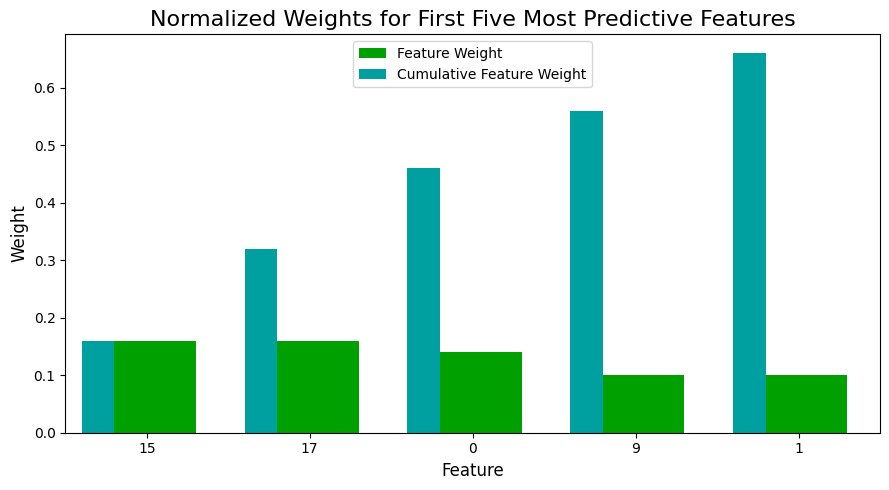

In [240]:
#There are other ways as well but I've choosen this as the given data seem to be nicely fit into supervised learningt echniques
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier().fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

# Discussions
Here we can see that the target variable I.e 'Women whose BMI is below Normal(<18.5Kg/m^2)' is a strong fucntion of these top 5 normalised variable which have indices:

15(Women age 20-24 years married before age 18 years (%)),

17(Women age 15-19 years who were already mothers or pregnant at the time of the survey (%)), 

0(Female population age 6 years and above who ever attended school (%)),

9(Households using clean fuel for cooking3 (%))


1(Population below age 15 years (%)),


Which are in the descending order of their importance or correlation with the target variable. And also we are given their comulative weight which that factor contributine to the mapping of the final target variable.From a laymen's perspective it may seem that some factors might be contributing more to the target variable but from the given statstistical data the much correlating factors might be altogether different.


In [248]:
#Let's map the other correlations of the target variables we have choosen
targets2=sample1[78]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(factors, targets2,test_size=0.2,random_state=42)

# Success
display(X_train.head(n=2))
display(y_train.head(n=2))
print("Training and testing split was successful.")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


,0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18
Karimnagar,63.6,20.1,1065,933,88.7,66.4,99.7,98.3,78.8,94.9,99.1,58.6,16.4,11.9,1.1,7.6,94.1
Jangoan,56.6,19.1,1066,1089,86.6,66.3,99.3,99.4,84.3,91.1,96.8,71.7,9.3,20.3,1.3,6.5,93.6


Karimnagar    28.8
Jangoan       24.1
Name: 78, dtype: object

Training and testing split was successful.
Training set has 28 samples.
Testing set has 7 samples.


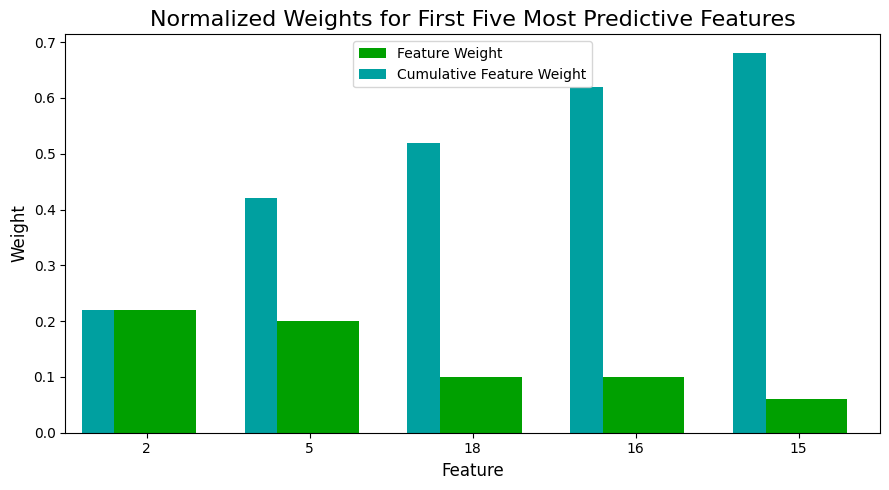

In [249]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier().fit(X_train,y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

# Discussions
Here we can see that the target variable I.e 'Women who are overweight or obese (BMI =25.0 kg/m2)21 (%)' is a strong fucntion of these top 5 normalised variable which are indices:

2(Sex ratio of the total population (females per 1,000 males)),

5( Deaths in the last 3 years registered with the civil authority (%)), 

18(Women age 15-24 years who use hygienic methods of protection during their menstrual period5 (%)),

16(Births in the 5 years preceding the survey that are third or higher order (%)),

15(Women age 20-24 years married before age 18 years (%)).... 

Which are in the descending order of their importance or correlation with the target variable. And also we are given their comulative weight which that factor contributine to the mapping of the final target variable.From a laymen's perspective it may seem that some factors might be contributing more to the target variable but from the given statstistical data the much correlating factors might be altogether different.

In [252]:
targets3=sample1[79]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(factors, targets2,test_size=0.2,random_state=42)

# Success
display(X_train.head(n=2))
display(y_train.head(n=2))
print("Training and testing split was successful.")
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


,0,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18
Karimnagar,63.6,20.1,1065,933,88.7,66.4,99.7,98.3,78.8,94.9,99.1,58.6,16.4,11.9,1.1,7.6,94.1
Jangoan,56.6,19.1,1066,1089,86.6,66.3,99.3,99.4,84.3,91.1,96.8,71.7,9.3,20.3,1.3,6.5,93.6


Karimnagar    28.8
Jangoan       24.1
Name: 78, dtype: object

Training and testing split was successful.
Training set has 28 samples.
Testing set has 7 samples.


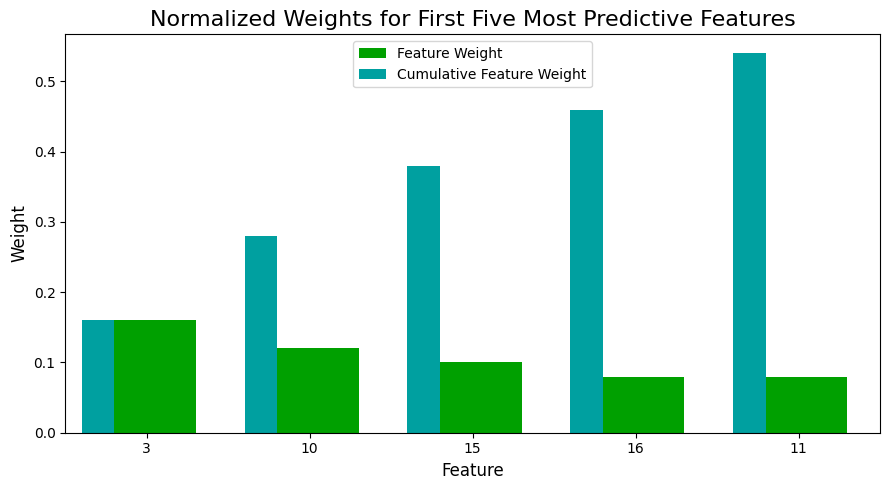

In [253]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier().fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

# Discussions
Here we can see that the target variable I.e 'Women who are overweight or obese (BMI =25.0 kg/m2)21 (%)' is a strong fucntion of these top 5 normalised variable which are indices:

3(Sex ratio at birth for children born in the last five years (females per 1,000 males)),

10(Households using iodized salt (%)), 

15(Women age 20-24 years married before age 18 years (%)),

16(Births in the 5 years preceding the survey that are third or higher order (%)),

11(Households with any usual member covered under a health insurance/financing scheme (%)).... 

Which are in the descending order of their importance or correlation with the target variable. And also we are given their comulative weight which that factor contributine to the mapping of the final target variable.From a laymen's perspective it may seem that some factors might be contributing more to the target variable but from the given statstistical data the much correlating factors might be altogether different.

# Policy recommendations

1. The top most correlating factor in all the three categories which are causing for the abysmal perfomance of the women on the nutritional front as of the given data is 'Women age 20-24 years marries before 18 years' which suggesting that we should never allowe the marriages to be takes place for women without the completion of 18 years of their age for them develop biological to be able to bear the effects after marriages as well thei mentallly to able to think maturedly as they are introduced to a host of things in the society in this tender age and also their consciousness of social begines to flower in this stage only.   

2. The next most common feature contibuting to target variable is 'Births in the 5 years preceding the survey that are third or higher order (%)' which suggests that there should be some control,consensus of engaging stakeholders,birth control methods(like vesectomy,contraceptive pills etc.,) and stature be applied strictly on the frequency and quantity of progeny for the women to be able to improve their BMI and reduce the risk of Hip-Weight ratio thus theor overall which in turn compounds as a whole to the well being of the society.

3. The next most coorrelatin thing is the 'Sex ratio' which kinda seem implict in the point of pregnency above but one strakingly important factor about this is the societal patriarchial structure and behavious towards girl child where even though they may be well nourished on a biological front, they may not be getting that kinda growth on the psychological front which sometimes(which is proven to be true by many scientific studies) detrimental to their well being as a whole as such we need to empower the girl child in terms of psychological nurturement,financial fron and also in the erasement of the structural stigmas and structures

4. The next most correlation is the sanitation and usage of clean fuel for cooking and other needs whose relationship seems direct for the wellbeing of the society as a whole and women in particular since they spend more time that men at home and also in dealing with cooking thing where the old ways of using wood is unhygenic and not suitable for the well being of women. As our body is made of mostly water, we need to take clean water for all the bodily function to be operated properly as such we need to provide the clean facilities to all the people as much as possible and also there is need to expand the outreach of the clean energy usage for cooking. There also needs to be some programmes that will directly impact,encourage and educate the people for switching to the clean fuel usage and water usage




Thank You very much.......

P.Hemanth
IIIT ONGOLE AP,RGUKT
Ph.NO:9182459782
Email:pulicharlahemanth64990@gmail.com